In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vivekchaurasia69","key":"a2ebc72e06cb0250a857afee7d65670c"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 121MB/s]


In [4]:
!unzip /content/nlp-getting-started.zip

Archive:  /content/nlp-getting-started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


#Loading the dataset

Importing the libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from keras.preprocessing.text import Tokenizer
from keras_preprocessing import sequence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Reading and printing the head of the dataframe

In [6]:
df = pd.read_csv("train.csv")
df.head(1)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1


In [7]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [8]:
df.shape

(7613, 5)

#EDA

In [ ]:
len(df["id"].unique())

7613

ID feature is not usefull because it is just a serial number with every row having a unique id. So we have to remove ID column.

In [9]:
df = df.drop("id" , axis = 1)
print(df.shape)
df.head(1)

(7613, 4)


,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1


Unique values in keyword:

In [ ]:
df["keyword"].unique()

In [ ]:
len(df["keyword"].unique())

222

We have total 222 unique value and Nan is also one of them. Now we have to find the total number values that have Nan in their row.

In [10]:
lst = list(df["keyword"].value_counts())

In [11]:
df["keyword"].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [32]:
key_keyword = df["keyword"].value_counts().keys()
value_keyword = df["keyword"].value_counts().values
list_of_tuples = list(zip(key_keyword, value_keyword))
kwyword_df = pd.DataFrame(list_of_tuples,
                  columns=['Words', 'Frequency'])

In [33]:
kwyword_df

,Words,Frequency
0,fatalities,45
1,deluge,42
2,armageddon,42
3,sinking,41
4,damage,41
...,...,...
216,forest%20fire,19
217,epicentre,12
218,threat,11
219,inundation,10


#Word cloud for keyword feature 

In [27]:
for i in  df.itertuples():
  print(i)
  for j in i[1].split():
    print(j)
    break
  break


Pandas(Index=31, keyword='ablaze', text='@bbcmtd wholesal market ablaz', target=1)
ablaze


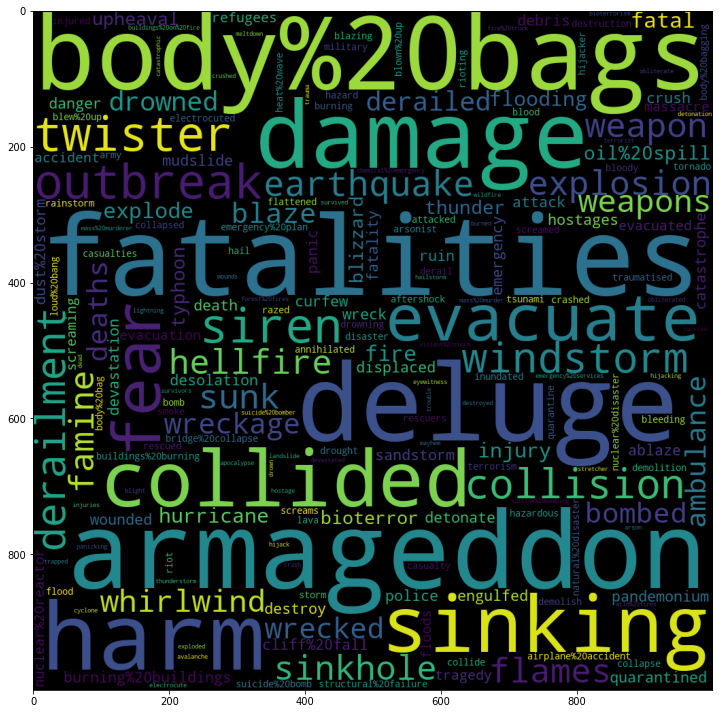

In [28]:
words = {}
for i in  df.itertuples():
    for j in i[1].split():
        try:
            words[j] += 1
        except:
            words[j] = 1

wordcloud = WordCloud(background_color = 'black', width=1000, height=1000).generate_from_frequencies(words)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.tight_layout(pad=1)
plt.show()

Above is the wordcloud for 221 keywords. fatalities, Armageddon, sinking, deluge are the most frequent word occuring.

In [ ]:
lst = df["keyword"].value_counts().values

In [ ]:
len(lst)

221

In [ ]:
abs(lst.sum() - df.shape[0])

61

We total have 61 values which has "Nan" in keyword feature.

In [ ]:
for i in df["keyword"].value_counts().keys():
  print(i)
  break
  

fatalities


In [ ]:
df["keyword"].value_counts()["fatalities"]

45

In [ ]:
df["keyword"].value_counts().keys()

Index(['fatalities', 'deluge', 'armageddon', 'sinking', 'damage', 'harm',
       'body%20bags', 'outbreak', 'evacuate', 'fear',
       ...
       'volcano', 'battle', 'bush%20fires', 'war%20zone', 'rescue',
       'forest%20fire', 'epicentre', 'threat', 'inundation',
       'radiation%20emergency'],
      dtype='object', length=221)

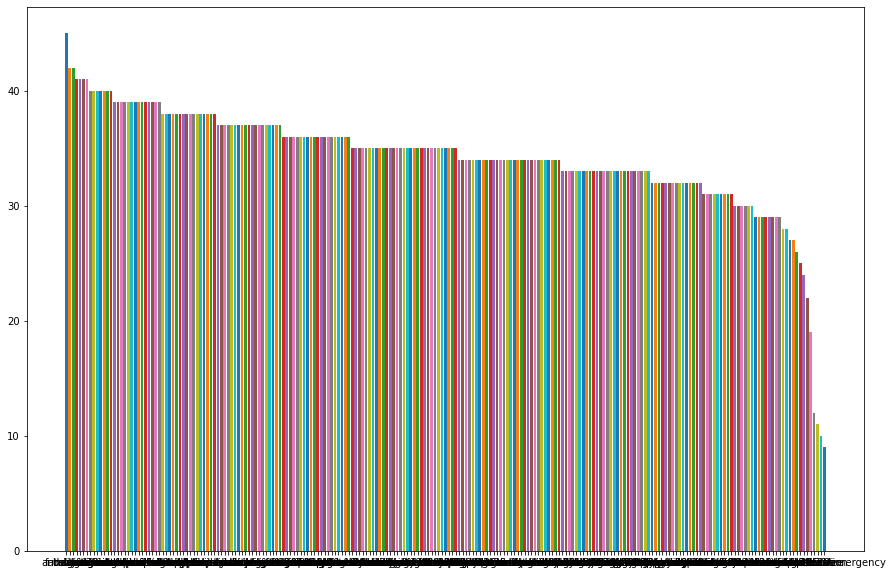

In [ ]:
"""
    Number of times keyword occur
"""

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i in df["keyword"].value_counts().keys():
  plt.bar( i ,df["keyword"].value_counts()[i] )

In [ ]:
cnt = 0
for i in df["keyword"].value_counts():
  if i <=30:
    pass
  else: cnt += 1
cnt

194

Mostly all the values frequecy is more than 20 which is good for our model. 

Out of 221 keywords, 194 keywords ouccur more than 194 time. Now we will not remove keyword feature, instead we will do some feature Engineering and replace Nan value with some string or since we only have 61 null values we will romove those rows.

In [ ]:
len(df["keyword"].value_counts())

221

In [12]:
df['keyword'].replace('', np.nan, inplace=True)
df.head(2)


,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [13]:
df.dropna(subset=['keyword'], inplace=True)
df.shape

(7552, 4)

In [ ]:
df.head(2)

,keyword,location,text,target
31,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0


Now we have successfully remove all the Null values and we have 7552 rows in our dataset.

#Location

In [ ]:
df.location

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7608    NaN
7609    NaN
7610    NaN
7611    NaN
7612    NaN
Name: location, Length: 7613, dtype: object

In [ ]:
len(list(df.location.unique()))

3342

In [ ]:
print("Total percentage of Null values = " ,  ((df.shape[0] - len(list(df.location.unique()))) /df.shape[0] )*100    )

Total percentage of Null values =  56.10140549060817


In [ ]:
print("Total number of Null values = " ,df.shape[0] - len(list(df.location.unique())) )

Total number of Null values =  4271


In [ ]:
cnt = 0
for i in df["location"].value_counts():
  if i <=5:
    cnt +=1

In [ ]:
len(list(df.location.unique())) - cnt 

77

In [ ]:
"The total number of locations that appears more than 5 times are only 77"

'The total number of locations that appears more than 5 times are only 77'

Now we will replace  empty rows with nan values and remove those rows which contains nan values

In [14]:
df['location'].replace('', np.nan, inplace=True)

In [ ]:
df.head()

,keyword,location,text,target
31,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In the location feature, we can see that most of the features appears less than 5 times.

Any there are many null values present in the feature. So its better to remove this feature/columns.

In [15]:
df = df.drop("location" , axis = 1)
print(df.shape)
df.head(1)

(7552, 3)


,keyword,text,target
31,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1


In [16]:
df.columns

Index(['keyword', 'text', 'target'], dtype='object')

Target values

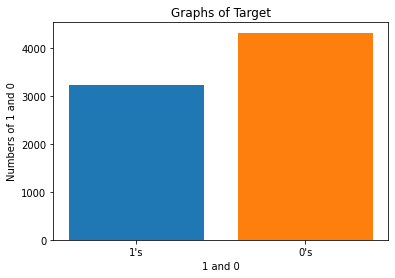

In [ ]:
plt.bar("1's",df.target.value_counts()[1])
plt.bar("0's",df.target.value_counts()[0])

plt.title("Graphs of Target")
plt.xlabel("1 and 0")
plt.ylabel("Numbers of 1 and 0")

plt.show()

In [ ]:
print("Percentage of 0 points are: " , df.target.value_counts()[0]/(df.target.value_counts()[0] + df.target.value_counts()[1]))

Percentage of 0 points are:  0.5724311440677966


In [ ]:
print("Percentage of 1 points are: " , df.target.value_counts()[1]/(df.target.value_counts()[0] + df.target.value_counts()[1]))

Percentage of 1 points are:  0.4275688559322034


The dataset is somewhat balanced and therefore we do not need to do any upsampling or downsampling.

#Feature Engineering

Clean data

In [17]:
"""
    Converting every words like i'm to I am and lowering all the words. Also Removing website and HTML tags and punctiation
"""
def clean_text(text):
  
  text = text.lower()
  text = re.sub(r"http\S+", "", text)
  text = re.sub(r"i'm", "i am", text)
  text = re.sub(r"he's", "he is", text)
  text = re.sub(r"she's", "she is", text)
  text = re.sub(r"it's", "it is", text)
  text = re.sub(r"that's", "that is", text)
  text = re.sub(r"what's", "that is", text)
  text = re.sub(r"where's", "where is", text)
  text = re.sub(r"how's", "how is", text)
  text = re.sub(r"\'ll", " will", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"can't", "cannot", text)
  text = re.sub(r"n't", " not", text)
  text = re.sub(r"n'", "ng", text)
  text = re.sub(r"'bout", "about", text)
  text = re.sub(r"'til", "until", text)
  text = re.sub(r"  ","",text)
  """Removing website and HTML tags and punctiation"""
  text = re.sub(r"www" , "", text)
  text = re.sub(r"com" , "", text)
  text = re.sub(r"http" , "", text)
  text = re.sub(r"https" , "", text)
  text = re.sub(r"&amp" , "", text)
  #text = re.sub(r"??" , "", text)
  text = re.sub(r"-()\"#/@;:<>{}`+=~|.!?,", "", text)
  
  return text

In [18]:
for i in range(len(df.text)):
  df.iloc[i , 1] = clean_text(df.iloc[i , 1])

In [ ]:
df.text[2:3]

33    #AFRICANBAZE: Breaking news:Nigeria flag set a...
Name: text, dtype: object

Removing stopwords

In [19]:
def stopword_removal(text):
  """Taking all the stopwords except "Not" """
  stop = [i for i in stopwords.words("english") if i != "not"]
  
  """ Splitting the text and removing the words 
      which are present in the list stop
  """ 
  words = []
  for i in text.split():
    if i not in stop:
      words.append(i)
  return " ".join(words)


In [20]:
stopword_removal("i am not a robot")

'not robot'

In [21]:
for i in range(len(df.text)):
  df.iloc[i , 1] = stopword_removal(df.iloc[i , 1])

Stemming

In [22]:
def stem(text):
  return ' '.join([PorterStemmer().stem(i) for i in text.split()])

In [ ]:
stem("likes liked")

'like like'

In [23]:
for i in range(len(df.text)):
  df.iloc[i , 1] = stem(df.iloc[i , 1])

In [ ]:
df.head()

,keyword,text,target
31,ablaze,@bbcmtd wholesal market ablaz,1
32,ablaze,alway tri bring heavy. #metal #rt,0
33,ablaze,#africanbaze: break news:nigeria flag set abla...,1
34,ablaze,cri more! set ablaz,0
35,ablaze,plu side look sky last night ablaz,0


#Word Cloud

In [ ]:
for i in df.itertuples():
  print(i)
  print(i[2])
  break

Pandas(Index=31, keyword='ablaze', text='@bbcmtd wholesal market ablaz', target=1)
@bbcmtd wholesal market ablaz


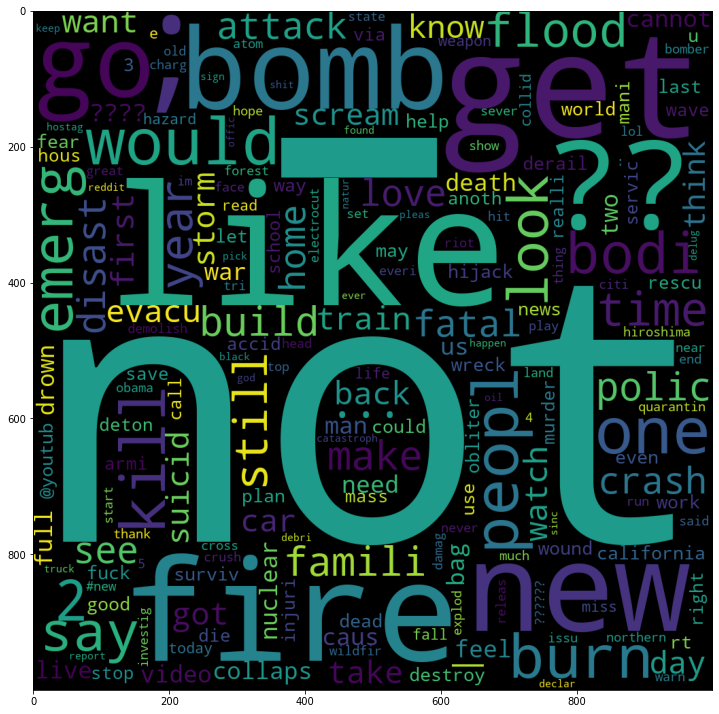

In [ ]:
words = {}
for i in  df.itertuples():
    for j in i[2].split():
        try:
            words[j] += 1
        except:
            words[j] = 1

wordcloud = WordCloud(background_color = 'black', width=1000, height=1000).generate_from_frequencies(words)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.tight_layout(pad=1)
plt.show()

#Splitting the dataset

In [ ]:
x = df.iloc[: , : -1]
y = df.iloc[: , -1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.10)

#Tokenization

Tokenizing the text columns in train and test set.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train.text)

In [ ]:
tokenized_essay_train  = tokenizer.texts_to_sequences(x_train)
tokenized_essay_test   = tokenizer.texts_to_sequences(x_test)

In [ ]:
train_padded_docs = sequence.pad_sequences(tokenized_essay_train, maxlen = 50  , padding='post' )
test_padded_docs  = sequence.pad_sequences(tokenized_essay_test, maxlen = 50 , padding='post')